<a href="https://colab.research.google.com/github/duc-ke/study-book-keras_with_blocks/blob/master/5_RNN_music_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN 만들기
악보 '나비야'를 이용해서 RNN학습 및 예측

In [0]:
# 변환 dictionary 생성
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

<img src='http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_2.png' width="700"/>

악보를 아래와 같이 리스트에 넣는다.

In [0]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [3]:
uniq_seq = seq[4:]
uniq_seq = set(uniq_seq)
uniq_seq

{'c8', 'd4', 'd8', 'e4', 'e8', 'f4', 'f8', 'g4', 'g8'}

In [0]:
import numpy as np

def seq2dataset(seq, window_size):
  window_size = window_size
  dataset = []
  for i in range(len(seq) - window_size):
    subset = seq[i:(i+window_size+1)]
    dataset.append([code2idx[each] for each in subset])
  return np.array(dataset)

In [0]:
dataset = seq2dataset(seq, 4)

In [6]:
dataset.shape, dataset

((50, 5), array([[11,  9,  2, 10,  8],
        [ 9,  2, 10,  8,  1],
        [ 2, 10,  8,  1,  7],
        [10,  8,  1,  7,  8],
        [ 8,  1,  7,  8,  9],
        [ 1,  7,  8,  9, 10],
        [ 7,  8,  9, 10, 11],
        [ 8,  9, 10, 11, 11],
        [ 9, 10, 11, 11,  4],
        [10, 11, 11,  4, 11],
        [11, 11,  4, 11,  9],
        [11,  4, 11,  9,  9],
        [ 4, 11,  9,  9,  9],
        [11,  9,  9,  9, 10],
        [ 9,  9,  9, 10,  8],
        [ 9,  9, 10,  8,  1],
        [ 9, 10,  8,  1,  7],
        [10,  8,  1,  7,  9],
        [ 8,  1,  7,  9, 11],
        [ 1,  7,  9, 11, 11],
        [ 7,  9, 11, 11,  9],
        [ 9, 11, 11,  9,  9],
        [11, 11,  9,  9,  2],
        [11,  9,  9,  2,  8],
        [ 9,  9,  2,  8,  8],
        [ 9,  2,  8,  8,  8],
        [ 2,  8,  8,  8,  8],
        [ 8,  8,  8,  8,  8],
        [ 8,  8,  8,  8,  9],
        [ 8,  8,  8,  9,  3],
        [ 8,  8,  9,  3,  9],
        [ 8,  9,  3,  9,  9],
        [ 9,  3,  9,  9,  9],
 

In [7]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
x_train = dataset[:, 0:4]
y_train = dataset[:, 4]

# 단순 정규화
max_value = 13
x_train = x_train / float(max_value)

# y one-hot
y_train = np_utils.to_categorical(y_train)

# (x_train, y_train)
one_hot_vec_size = y_train.shape[1]
print('y class 사이즈: {}'.format(one_hot_vec_size))

y class 사이즈: 12


## 모델링

### 1. MLP로 모델링

In [0]:
class MLP(Sequential):
  def __init__(self, num_of_classes):
    super().__init__()
    
    self.add(Dense(128, activation='relu', input_shape=(4, )))
    self.add(Dense(128, activation='relu'))
    self.add(Dense(num_of_classes, activation='softmax'))

    self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model = MLP(one_hot_vec_size)
history = model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2000





 - 9s - loss: 2.4532 - acc: 0.1600
Epoch 2/2000
 - 0s - loss: 2.3428 - acc: 0.3600
Epoch 3/2000
 - 0s - loss: 2.2504 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.1693 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.0821 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.0125 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 1.9547 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 1.9294 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.8951 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.8762 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.8552 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.8350 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.8166 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.8033 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.7860 - acc: 0.3600
Epoch 16/2000
 - 0s - loss: 1.7733 - acc: 0.3800
Epoch 17/2000
 - 0s - loss: 1.7627 - acc: 0.3800
Epoch 18/2000
 - 0s - loss: 1.7442 - acc: 0.3800
Epoch 19/2000
 - 0s 

In [11]:
!git clone https://github.com/duc-ke/study-book-keras_with_blocks.git
%run study-book-keras_with_blocks/0_custom_libraries.ipynb

Cloning into 'study-book-keras_with_blocks'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 184 (delta 78), reused 151 (delta 61), pack-reused 0
Receiving objects: 100% (184/184), 316.71 KiB | 6.09 MiB/s, done.
Resolving deltas: 100% (78/78), done.


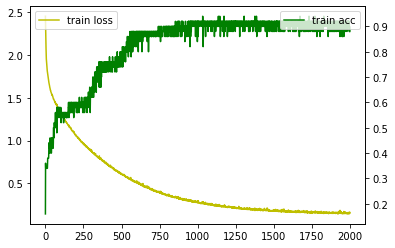

In [12]:
plot_accloss_trainonly(history)

In [13]:
evaluation = model.evaluate(x_train, y_train)
print(evaluation)

50/50 [==============================] - 0s 787us/step
[0.14591459572315216, 0.9200000023841858]


## 모델 사용
1. 한 스텝 예측
1. 곡 전체 예측

In [0]:
# 최대 예측 갯수 정의
pred_count = 50

#### 1. 한 스텝 예측

In [15]:
result_code_list = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)
class_out = np.argmax(pred_out, axis=1)
for each in class_out:
  result_code_list.append(idx2code[each])

print(result_code_list)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### 곡 전체 예측

In [16]:
input_code = ['g8', 'e8', 'e4', 'f8']
input_code_idx = [code2idx[each] / float(max_value) for each in input_code]


result_code_list2 = input_code.copy()
for i in range(x_train.shape[0]):
  sample_in = np.array(input_code_idx)
  sample_in = sample_in.reshape(1, -1)
  pred_out = model.predict(sample_in)
  class_out = np.argmax(pred_out)
  pred_code = idx2code[class_out]

  result_code_list2.append(pred_code)
  input_code_idx.append(class_out/float(max_value))
  input_code_idx.pop(0)
  # print(input_code_idx)

print(result_code_list2)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


#### 일치율 확인

In [0]:
def show_match_ratio(true_seq, pred_seq):
  total_n = len(true_seq)
  match_n = 0
  for true, pred in zip(true_seq, pred_seq):
    if true == pred:
      match_n += 1
  match_ratio = match_n / total_n * 100
  print('{:.2f}% match!'.format(match_ratio))



In [23]:
show_match_ratio(seq, result_code_list)

92.59% match!


In [24]:
show_match_ratio(seq, result_code_list2)

25.93% match!


아무래도 곡 전체 예측에선 하나가 틀리면 연쇄적으로 틀림